In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex


Selon la figure de la question 2, nous pouvons calculer la probabilite conjointe comme suit:

$$P(C,T,A,M,J) = P(C) \cdot P(T) \cdot P(A|T,C) \cdot P(M|A) \cdot P(J|A)$$

Comme toutes les données nous sont données, nous pouvons coder un modèle simplifié pour effectuer le calcul brute.



In [4]:
def probC(C):
    if C:
        return 0.001
    return 1-0.001

def probT(T):
    if T:
        return 0.002
    return 1-0.002

def probA(A,C,T):
    if A:
        if C:
            if T:
                return .95
            return .94
        if not C:
            if T:
                return .29
            return .001
    if not A:
        if C:
            if T:
                return 1-.95
            return 1-.94
        if not C:
            if T:
                return 1-.29
            return 1-.001

def probM(M,A):
    if M:
        if A:
            return .9
        return .05
    if not M:
        if A:
            return 1-.9
        return 1-.05

def probJ(J,A):
    if J:
        if A:
            return .7
        return .01
    if not J:
        if A:
            return 1-.7
        return 1-.01
    
def jointProb(C,T,A,M,J):
    return probC(C) * probT(T) * probA(A,C,T) * probM(M,A) * probJ(J,A)

In [5]:
vals = [0,1]
jointProbVals = np.zeros((2,2,2,2,2))

for c in range(len(vals)):
    for t in range(len(vals)):
        for a in range(len(vals)):
            for m in range(len(vals)):
                for j in range(len(vals)):
                    jointProbVals[c,t,a,m,j] = jointProb(c,t,a,m,j)

                    

In [6]:
# Since there are a lot of possibilites, we enumerate all of them form 0 to 2^5, and we associate each possibility
# to a number on the bar chart.

print('c t a m j    index on the bar chart')
count = 0
for c in range(len(vals)):
    for t in range(len(vals)):
        for a in range(len(vals)):
            for m in range(len(vals)):
                for j in range(len(vals)):
                    print(c,t,a,m,j,'             ',count)
                    count += 1

c t a m j    index on the bar chart
0 0 0 0 0               0
0 0 0 0 1               1
0 0 0 1 0               2
0 0 0 1 1               3
0 0 1 0 0               4
0 0 1 0 1               5
0 0 1 1 0               6
0 0 1 1 1               7
0 1 0 0 0               8
0 1 0 0 1               9
0 1 0 1 0               10
0 1 0 1 1               11
0 1 1 0 0               12
0 1 1 0 1               13
0 1 1 1 0               14
0 1 1 1 1               15
1 0 0 0 0               16
1 0 0 0 1               17
1 0 0 1 0               18
1 0 0 1 1               19
1 0 1 0 0               20
1 0 1 0 1               21
1 0 1 1 0               22
1 0 1 1 1               23
1 1 0 0 0               24
1 1 0 0 1               25
1 1 0 1 0               26
1 1 0 1 1               27
1 1 1 0 0               28
1 1 1 0 1               29
1 1 1 1 0               30
1 1 1 1 1               31


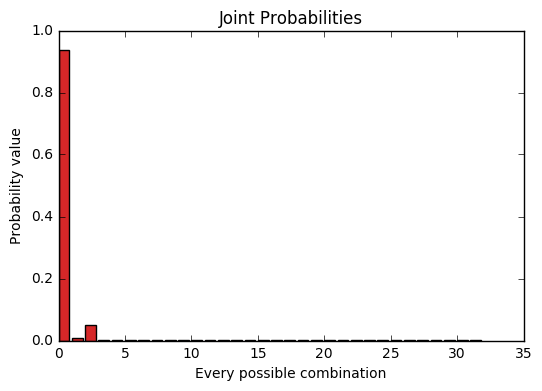

In [7]:

N = 2**5
ind = np.arange(N) 


p1 = plt.bar(ind, jointProbVals.flatten(), color='#d62728')

plt.xlabel('Every possible combination')
plt.ylabel('Probability value')
plt.title('Joint Probabilities')

plt.show()

       Calculs par force brute 

 Par la règle de Bayes nous savons que:
 P(C|M,J) = P(C,M,J) / P(M,J) 

 Nous avons aussi:
 P(C,M,J) = sumOfAllValuesOfT * sumOfAllValuesOfA ( P(C,T,A,M,J) )

In [8]:

pC_M_J= jointProbVals.sum(axis=1).sum(axis=1)
pM_J= jointProbVals.sum(axis=0).sum(axis=0).sum(axis=0)


print("probC_given_M_notJ:\t", pC_M_J[1,1,0]/pM_J[1,0])

print("probC_given_notM_J:\t", pC_M_J[1,0,1]/pM_J[0,1])

print("probC_given_M_J:\t", pC_M_J[1,1,1]/pM_J[1,1])

print("probC_given_notM_notJ:\t", pC_M_J[1,0,0]/pM_J[0,0])

# De nouveau par Bayes nous avons que:
# P(C|M) = P(C,M) / P(M) 
#
# Nous avons aussi:
# P(C,M) = sumOfAllValuesOfT * sumOfAllValuesOfA * sumOfAllValuesOfJ ( P(C,T,A,M,J) )

pC_M= jointProbVals.sum(axis=1).sum(axis=1).sum(axis=2)
pM= jointProbVals.sum(axis=0).sum(axis=0).sum(axis=0).sum(axis=1)

print("probC_given_M:\t\t", pC_M[1,1]/pM[1])

pC_J= jointProbVals.sum(axis=1).sum(axis=1).sum(axis=1)

pJ= jointProbVals.sum(axis=0).sum(axis=0).sum(axis=0).sum(axis=0)

print("probC_given_J:\t\t", pC_J[1,1]/pJ[1])

probC_given_M_notJ:	 0.0051298581334
probC_given_notM_J:	 0.00687624607342
probC_given_M_J:	 0.284171835364
probC_given_notM_notJ:	 9.01843937548e-05
probC_given_M:		 0.0162837299468
probC_given_J:		 0.0561174540389


    Calcul des marginales inconditionelles
 Nous avons deja calculé P(J) et P(M), nous allons procéder aux autres 
 variables avec la même stratégie.x

In [9]:


pC= jointProbVals.sum(axis=1).sum(axis=1).sum(axis=1).sum(axis=1)
pT= jointProbVals.sum(axis=0).sum(axis=1).sum(axis=1).sum(axis=1)
pA= jointProbVals.sum(axis=0).sum(axis=0).sum(axis=1).sum(axis=1)

print("Variable \t [ P(0)    P(1)]")
print("P(C) \t\t", pC)
print("P(T) \t\t", pT)
print("P(A) \t\t", pA)
print("P(M) \t\t", pM)
print("P(J) \t\t", pJ)

Variable 	 [ P(0)    P(1)]
P(C) 		 [ 0.999  0.001]
P(T) 		 [ 0.998  0.002]
P(A) 		 [ 0.99748356  0.00251644]
P(M) 		 [ 0.94786102  0.05213898]
P(J) 		 [ 0.98826366  0.01173634]


Pour réussir à calculer les marginales, nous partons à chaque fois de la probabilité jointe de tout le réseau, puisque celle-ci contient toute l'information nécessaire. Pour par caluler la probabilité que Jean apelle (J), nous utilisons cette équation:

$$P(J) = \sum_{c}\sum_{t}\sum_{a}\sum_{m} P(c,t,a,m,j)$$

Nous sommons ici sur toutes les valeurs possibles du reste des variables pour marginaliser la probabilité qui nous intéresse.
Pour obtenir une probabilité conjointe, la stratégie est la même, mais nous devons d'abord réarranger l'epxression:

$$P(C|J) = \frac{P(C,J)}{P(J)}$$

Nous savons déjà comment calculer P(J), il nous reste alors à calculer P(C,J). Cela se fait comme suit:

$$P(C,J) = \sum_{t}\sum_{a}\sum_{m} P(c,t,a,m,j)$$